In [12]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import math
import copy
from numpy import array
from datetime import datetime
from scipy.interpolate import splprep, splev
from shapely import Polygon, Point, LineString


In [35]:
# track data & constants
TRACK_NAME = '2022_may_open_ccw'
TRACK_LENGTH = 60.00
TRACK_WIDTH = 1.28
TRACK_REDUCTION = 0.05

# AWS parameters
waypoints = np.load(f'../resources/tracks/{TRACK_NAME}.npy')
closest_waypoints = [1, 2]  # mocked
# params, as defined for a reward function
MIN_SPEED = 0.5
MAX_SPEED = 3.0
STEP_INTERVAL = 4  # steps to complete before evaluation
HEADING_THRESHOLD = 12.5  # yaw, agent heading
LOOK_AHEAD = 10  # qty upcoming points to consider for curvature
MAX_DISTANCE = 0.05  # acceptable distance from optimized race line
LINEAR_THRESHOLD = 0.30  # acceptable diff to satisfy linear regression
TURN_THRESHOLD = 0.10  # acceptable diff to qualify as turn
STEERING_ANGLE_THRESHOLD = 12.5  # acceptable steering angle cap
# CURRENT_INDEX = params['closest_waypoints'][1]


In [36]:
# import optimized race line
with open("./racelines/2022_may_open_ccw-1000-8-2024-08-01-220319.py", "r") as f:
    optimized_race_line = eval(f.read())

In [7]:
def reduce_track_width(ib, ob, reduction_percentage=TRACK_REDUCTION):
    # Calculate the center of the track
    track_center = (ib + ob) / 2

    # Reduce the width by moving the borders towards the center
    inner_border_reduced = track_center + (ib - track_center) * (1 - reduction_percentage)
    outer_border_reduced = track_center + (ob - track_center) * (1 - reduction_percentage)

    return inner_border_reduced, outer_border_reduced

In [25]:
# plotting functions
def plot_track(center_line, inner_border, outer_border, closest_waypoints=None):
    center_x, center_y = center_line[:, 0], center_line[:, 1]
    inner_x, inner_y = inner_border[:, 0], inner_border[:, 1]
    outer_x, outer_y = outer_border[:, 0], outer_border[:, 1]

    # Plot the waypoints
    plt.figure(figsize=(10, 6))
    plt.plot(center_x, center_y, 'r--', label='Center Line')
    plt.plot(inner_x, inner_y, 'g-', label='Inner Border')
    plt.plot(outer_x, outer_y, 'b-', label='Outer Border')

    if closest_waypoints is not None:
        closest_waypoints = [0, 1]
        plt.scatter(waypoints[closest_waypoints[0], 0], waypoints[closest_waypoints[0], 1], color='red', s=100, zorder=5)

    # Add labels and legend
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Track Waypoints')
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.axis('equal')  # Ensures equal scaling for x and y axes
    plt.show()

def plot_two_lines(line1, line2, line1_label='Line 1', line2_label='Line 2'):
    plt.figure(figsize=(10, 6))

    # Plot first line
    plt.plot(line1[:, 0], line1[:, 1], linestyle='-', color='b', label=line1_label)

    # Plot second line
    plt.plot(line2[:, 0], line2[:, 1], linestyle='-', color='r', label=line2_label)

    # Titles and labels
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

In [26]:
# establish default lines and reduced track borders
center_line = waypoints[:, 0:2]
inner_border = waypoints[:, 2:4]
outer_border = waypoints[:, 4:6]
reduced_inner_border, reduced_outer_border = reduce_track_width(inner_border, outer_border, TRACK_REDUCTION)

comparison of track center with the optimized race line


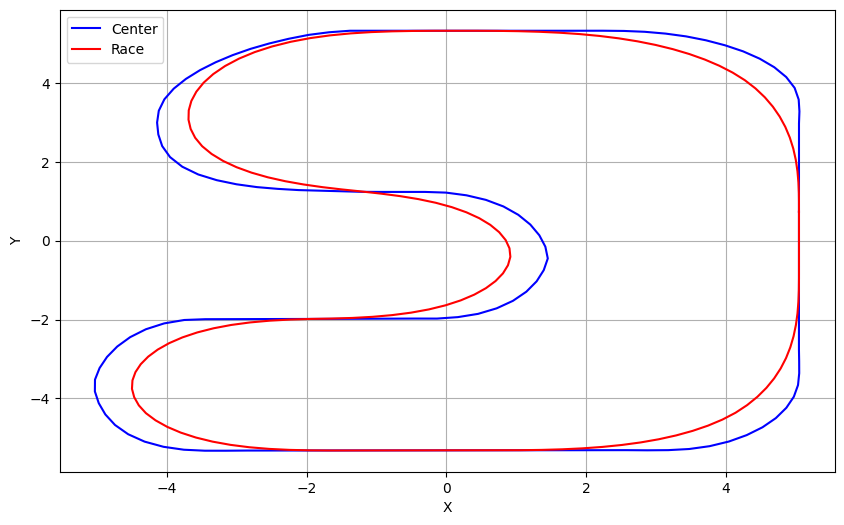

optimized line with standard borders


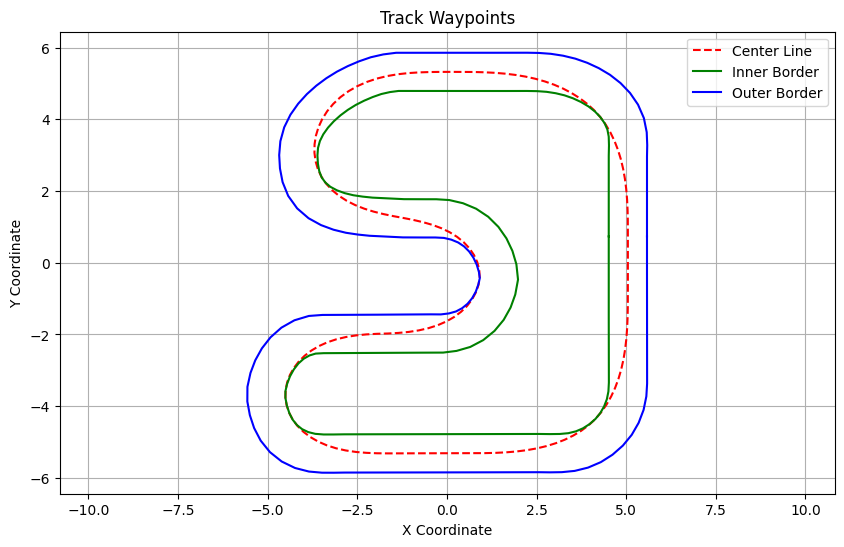

optimized line with reduced borders


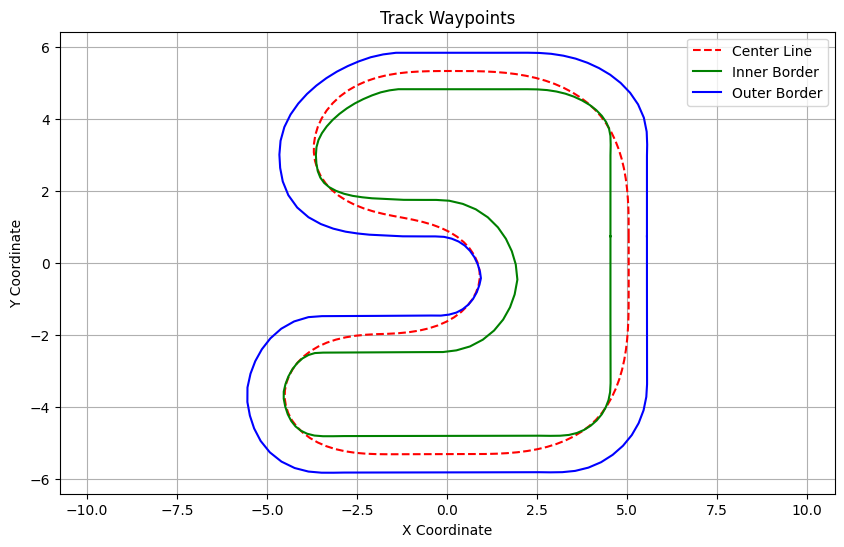

In [37]:
# plot center line and optimized race line
print('comparison of track center with the optimized race line')
plot_two_lines(center_line, optimized_race_line, 'Center', 'Race')
print('optimized line with standard borders')
plot_track(optimized_race_line, inner_border, outer_border)
print('optimized line with reduced borders')
plot_track(optimized_race_line, reduced_inner_border, reduced_outer_border)